In [1]:
endpoint = 'https://westeurope.api.cognitive.microsoft.com/'
key = '647f71623dde492d92b04b0d5f01ed5a'
Region = 'westeurope'

# <span class="ms-Pivot-text text-192"> Image analysis</span> (이미지 분석)

## Add captions to images (이미지 전체를 보고 설명함)
* Generate a human-readable sentence that describes the content of an image.
* 이미지에 대한 설명을 해줌

In [ ]:
import os
from azure.ai.vision.imageanalysis import ImageAnalysisClient
from azure.ai.vision.imageanalysis.models import VisualFeatures
from azure.core.credentials import AzureKeyCredential


# Set the values of your computer vision endpoint and computer vision key
# as environment variables:
# try:
#     endpoint = os.environ["VISION_ENDPOINT"]
#     key = os.environ["VISION_KEY"]
# except KeyError:
#     print("Missing environment variable 'VISION_ENDPOINT' or 'VISION_KEY'")
#     print("Set them before running this sample.")
#     exit()


# Create an Image Analysis client
client = ImageAnalysisClient(
    endpoint=endpoint,
    credential=AzureKeyCredential(key)
)


# 로컬에 있는 파일을 할건지, url로 할건지
input_image = "/Users/laxdin24/Desktop/스크린샷 2025-03-24 오전 11.28.17.png"
# https://learn.microsoft.com/azure/ai-services/computer-vision/media/quickstarts/presentation.png


if not "https://" in input_image or not "http://" in input_image:
# Load image to analyze into a 'bytes' object
    with open(input_image, "rb") as f:
        image_data = f.read()

        # Get a caption for the image. This will be a synchronously (blocking) call.
        result = client.analyze(
            image_data=image_data,
            visual_features=[VisualFeatures.CAPTION],
            gender_neutral_caption=True,  # Optional (default is False)
        )
else:
    # Get a caption for the image. This will be a synchronously (blocking) call.
    result = client.analyze_from_url(
        image_url=input_image,
        visual_features=[VisualFeatures.CAPTION, VisualFeatures.READ],
        gender_neutral_caption=True,  # Optional (default is False)
    )


print("Image analysis results:")
# Print caption results to the console
print(" Caption:")
if result.caption is not None:
    print(f"   '{result.caption.text}', Confidence {result.caption.confidence:.4f}")

# Print text (OCR) analysis results to the console
# print(" Read:")
# if result.read is not None:
#     for line in result.read.blocks[0].lines:
#         print(f"   Line: '{line.text}', Bounding box {line.bounding_polygon}")
#         for word in line.words:
#             print(f"     Word: '{word.text}', Bounding polygon {word.bounding_polygon}, Confidence {word.confidence:.4f}")

## Add dense captions to images(이미지 내에 객체에 대해서 각각 설명함)
* 이미지에서 감지된 모든 중요한 객체에 대해 사람이 읽을 수 있는 캡션을 생성합니다.
    * 위코드는 이미지 전체를 설명하는 캡션이라면, 덴스캡션은 특정 오브젝트들에 대한 캡션들(여러개)을 설명함
* 위 코드에서 구조만 살짝 바꾸고 출력형식만 추가함

In [ ]:
import os
from azure.ai.vision.imageanalysis import ImageAnalysisClient
from azure.ai.vision.imageanalysis.models import VisualFeatures
from azure.core.credentials import AzureKeyCredential


# Set the values of your computer vision endpoint and computer vision key
# as environment variables:
# try:
#     endpoint = os.environ["VISION_ENDPOINT"]
#     key = os.environ["VISION_KEY"]
# except KeyError:
#     print("Missing environment variable 'VISION_ENDPOINT' or 'VISION_KEY'")
#     print("Set them before running this sample.")
#     exit()


# Create an Image Analysis client
client = ImageAnalysisClient(
    endpoint=endpoint,
    credential=AzureKeyCredential(key)
)


# 로컬에 있는 파일을 할건지, url로 할건지
input_image = "/Users/laxdin24/Desktop/스크린샷 2025-03-24 오전 11.28.17.png"
# https://learn.microsoft.com/azure/ai-services/computer-vision/media/quickstarts/presentation.png

visual_features=[
    VisualFeatures.DENSE_CAPTIONS,
    VisualFeatures.CAPTION,
    VisualFeatures.READ
    ]


if not "https://" in input_image or not "http://" in input_image:
# Load image to analyze into a 'bytes' object
    with open(input_image, "rb") as f:
        image_data = f.read()

        # Get a caption for the image. This will be a synchronously (blocking) call.
        result = client.analyze(
            image_data=image_data,
            visual_features=visual_features,
            gender_neutral_caption=True,  # Optional (default is False)
        )
else:
    # Get a caption for the image. This will be a synchronously (blocking) call.
    result = client.analyze_from_url(
        image_url=input_image,
        visual_features=visual_features,
        gender_neutral_caption=True,  # Optional (default is False)
    )


print("Image analysis results:")
# Print caption results to the console
if result.dense_captions is not None:
    print(" Dense Captions:")
    for caption in result.dense_captions.list:
        print(f"   '{caption.text}', {caption.bounding_box}, Confidence: {caption.confidence:.4f}")

print(" Caption:")
if result.caption is not None:
    print(f"   '{result.caption.text}', Confidence {result.caption.confidence:.4f}")

# Print text (OCR) analysis results to the console
# print(" Read:")
# if result.read is not None:
#     for line in result.read.blocks[0].lines:
#         print(f"   Line: '{line.text}', Bounding box {line.bounding_polygon}")
#         for word in line.words:
#             print(f"     Word: '{word.text}', Bounding polygon {word.bounding_polygon}, Confidence {word.confidence:.4f}")

* 여러 기능 추가
    * DENSE_CAPTIONS
    * CAPTION
    * PEOPLE
    * OBJECTS

In [3]:
import os
from azure.ai.vision.imageanalysis import ImageAnalysisClient
from azure.ai.vision.imageanalysis.models import VisualFeatures
from azure.core.credentials import AzureKeyCredential


# Set the values of your computer vision endpoint and computer vision key
# as environment variables:
# try:
#     endpoint = os.environ["VISION_ENDPOINT"]
#     key = os.environ["VISION_KEY"]
# except KeyError:
#     print("Missing environment variable 'VISION_ENDPOINT' or 'VISION_KEY'")
#     print("Set them before running this sample.")
#     exit()


# Create an Image Analysis client
client = ImageAnalysisClient(
    endpoint=endpoint,
    credential=AzureKeyCredential(key)
)


# 로컬에 있는 파일을 할건지, url로 할건지
input_image = "/Users/laxdin24/Desktop/스크린샷 2025-03-24 오전 11.28.17.png"
# https://learn.microsoft.com/azure/ai-services/computer-vision/media/quickstarts/presentation.png

visual_features=[
    VisualFeatures.DENSE_CAPTIONS,
    VisualFeatures.CAPTION,
    VisualFeatures.PEOPLE,
    VisualFeatures.OBJECTS,
    VisualFeatures.READ
    ]


if not "https://" in input_image or not "http://" in input_image:
# Load image to analyze into a 'bytes' object
    with open(input_image, "rb") as f:
        image_data = f.read()

        # Get a caption for the image. This will be a synchronously (blocking) call.
        result = client.analyze(
            image_data=image_data,
            visual_features=visual_features,
            gender_neutral_caption=True,  # Optional (default is False)
        )
else:
    # Get a caption for the image. This will be a synchronously (blocking) call.
    result = client.analyze_from_url(
        image_url=input_image,
        visual_features=visual_features,
        gender_neutral_caption=True,  # Optional (default is False)
    )


print("Image analysis results:")
# Print caption results to the console
if result.dense_captions is not None:
    print(" Dense Captions:")
    for caption in result.dense_captions.list:
        print(f"   '{caption.text}', {caption.bounding_box}, Confidence: {caption.confidence:.4f}")

print(" Caption:")
if result.caption is not None:
    print(f"   '{result.caption.text}', Confidence {result.caption.confidence:.4f}")

if result.objects is not None:
    print(" Objects:")
    for object in result.objects.list:
        print(f"   '{object.tags[0].name}', {object.bounding_box}, Confidence: {object.tags[0].confidence:.4f}")

if result.people is not None:
    print(" People:")
    for person in result.people.list:
        print(f"   {person.bounding_box}, Confidence {person.confidence:.4f}")

# Print text (OCR) analysis results to the console
# print(" Read:")
# if result.read is not None:
#     for line in result.read.blocks[0].lines:
#         print(f"   Line: '{line.text}', Bounding box {line.bounding_polygon}")
#         for word in line.words:
#             print(f"     Word: '{word.text}', Bounding polygon {word.bounding_polygon}, Confidence {word.confidence:.4f}")


Image analysis results:
 Dense Captions:
   'a person climbing a rock wall', {'x': 0, 'y': 0, 'w': 1816, 'h': 3054}, Confidence: 0.8380
   'a person climbing a rock wall', {'x': 470, 'y': 476, 'w': 521, 'h': 1042}, Confidence: 0.8208
   'a close up of a rock climbing wall', {'x': 313, 'y': 1310, 'w': 256, 'h': 260}, Confidence: 0.7799
   'a close up of an orange object', {'x': 298, 'y': 895, 'w': 272, 'h': 302}, Confidence: 0.7224
   'a person in a black shirt', {'x': 503, 'y': 712, 'w': 343, 'h': 371}, Confidence: 0.7667
   'a blue object on a wall', {'x': 773, 'y': 2546, 'w': 116, 'h': 101}, Confidence: 0.6969
   'a pair of black objects on a wooden surface', {'x': 226, 'y': 2489, 'w': 264, 'h': 261}, Confidence: 0.7085
   'a white panel with holes in it', {'x': 122, 'y': 52, 'w': 638, 'h': 490}, Confidence: 0.6455
   'a rock climbing device with a hole', {'x': 1260, 'y': 857, 'w': 94, 'h': 102}, Confidence: 0.6593
   'a blue object on a white surface', {'x': 992, 'y': 2248, 'w': 263

* 그라디오로 구현하기
* 이미지에 바운딩박스 그리기

In [ ]:
import os
import gradio as gr
from azure.ai.vision.imageanalysis import ImageAnalysisClient
from azure.ai.vision.imageanalysis.models import VisualFeatures
from azure.core.credentials import AzureKeyCredential
from PIL import Image, ImageDraw

def analyze_image(image_file):
    # Create an Image Analysis client
    client = ImageAnalysisClient(
        endpoint=endpoint,
        credential=AzureKeyCredential(key)
    )

    visual_features=[
        VisualFeatures.PEOPLE,
        VisualFeatures.READ
        ]

    with open(image_file, "rb") as f:
        image_data = f.read()

        # Get a caption for the image. This will be a synchronously (blocking) call.
        result = client.analyze(
            image_data=image_data,
            visual_features=visual_features,
            gender_neutral_caption=True,  # Optional (default is False)
        )

    if result.people is not None:
        # 이미지 열기
        img = Image.open(image_file)

        # Draw 객체 생성
        draw = ImageDraw.Draw(img)
        for person in result.people.list:
            print(f"{person.bounding_box}, Confidence {person.confidence:.4f}")

            # 예시 bounding box: [x, y, width, height]
            bbox = [person.bounding_box.x, person.bounding_box["y"], person.bounding_box.width, person.bounding_box["h"]]  # (left, top, width, height)
                        # sdk 에서는 .x 를 해도됨       # rest_api에서는 json으로 응답받기때문에 [""] 사용
            # (x1, y1, x2, y2) 형식으로 변환
            x1, y1 = bbox[0], bbox[1]
            x2, y2 = x1 + bbox[2], y1 + bbox[3]

            # 박스 그리기
            draw.rectangle([x1, y1, x2, y2], outline="red", width=3)

    return img
     

# Gradio Interface
with gr.Blocks(theme=gr.themes.Soft(primary_hue="blue", secondary_hue="cyan"), css="body {background: linear-gradient(to right, #e0eafc, #cfdef3);}") as demo:
    gr.Markdown("# 🧠 Azure Vision Image Analysis", elem_id="title")
    gr.Markdown("Upload an image or provide a URL to analyze.")
    with gr.Column():
        input_image_box = gr.Image(label="입력이미지", type="filepath")
        submit_button = gr.Button("제출")
        output_image_box = gr.Image(label="출력이미지", interactive=False)
        

    submit_button.click(fn=analyze_image , inputs=[input_image_box], outputs=[output_image_box])
    

demo.launch()

* 다른기능도 바운딩박스 이미지에 그려서 각 기능별 출력할 수 있게 구현

In [18]:
import os
import gradio as gr
from azure.ai.vision.imageanalysis import ImageAnalysisClient
from azure.ai.vision.imageanalysis.models import VisualFeatures
from azure.core.credentials import AzureKeyCredential
from PIL import Image, ImageDraw


def analyze_image(image_file, mode):
    client = ImageAnalysisClient(
        endpoint=endpoint,
        credential=AzureKeyCredential(key)
    )

    visual_features_map = {
        "PEOPLE": [VisualFeatures.PEOPLE],
        "OBJECTS": [VisualFeatures.OBJECTS],
        "CAPTION": [VisualFeatures.CAPTION],
        "DENSE_CAPTIONS": [VisualFeatures.DENSE_CAPTIONS]
    }

    selected_features = visual_features_map.get(mode)

    with open(image_file, "rb") as f:
        image_data = f.read()

    result = client.analyze(
        image_data=image_data,
        visual_features=selected_features,
        gender_neutral_caption=True
    )

    img = Image.open(image_file)
    draw = ImageDraw.Draw(img)

    if mode == "PEOPLE" and result.people is not None:
        for person in result.people.list:
            bbox = person.bounding_box
            x1, y1 = bbox.x, bbox.y
            x2, y2 = x1 + bbox.width, y1 + bbox.height
            draw.rectangle([x1, y1, x2, y2], outline="red", width=3)

    elif mode == "OBJECTS" and result.objects is not None:
        for obj in result.objects.list:
            bbox = obj.bounding_box
            x1, y1 = bbox.x, bbox.y
            x2, y2 = x1 + bbox.width, y1 + bbox.height
            draw.rectangle([x1, y1, x2, y2], outline="blue", width=3)
            draw.text((x1 + 5, y1 + 5), obj.tags[0].name, fill="blue")

    elif mode == "CAPTION" and result.caption is not None:
        draw.text((130, 130), result.caption.text, fill="white")

    elif mode == "DENSE_CAPTIONS" and result.dense_captions is not None:
        for caption in result.dense_captions.list:
            bbox = caption.bounding_box
            x1, y1 = bbox.x, bbox.y
            x2, y2 = x1 + bbox.width, y1 + bbox.height
            draw.rectangle([x1, y1, x2, y2], outline="green", width=2)
            draw.text((x1 + 5, y1 + 5), caption.text, fill="green")

    return img

# Gradio UI
with gr.Blocks() as demo:
    gr.Markdown("# 🧠 Azure Vision Image Analysis", elem_id="title")
    gr.Markdown("Upload an image and choose the analysis mode.")

    with gr.Column():
        radio = gr.Radio([
            "PEOPLE", "OBJECTS", "CAPTION", "DENSE_CAPTIONS"
        ], label="어떤 기능을 사용하시겠어요?", value="PEOPLE")

        input_image_box = gr.Image(label="입력이미지", type="filepath")
        submit_button = gr.Button("제출")
        output_image_box = gr.Image(label="출력이미지", interactive=False)

    submit_button.click(fn=analyze_image, inputs=[input_image_box, radio], outputs=[output_image_box])

demo.launch()

* Running on local URL:  http://127.0.0.1:7875

To create a public link, set `share=True` in `launch()`.


## BackgroundRemoval(백그라운드 이미지 제거) or ForegroundMatting(경계선 구분하기)

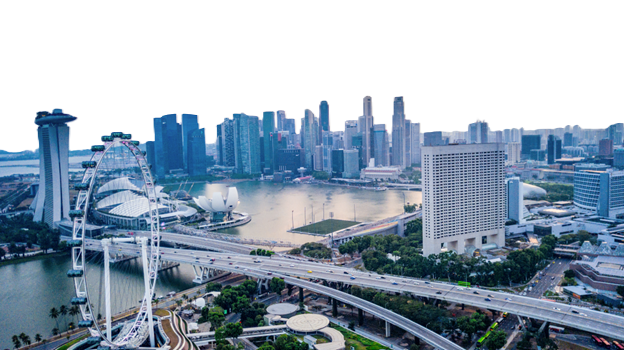

In [ ]:
import requests
from PIL import Image

vision_endpoint = 'https://a026-aivision-test1.cognitiveservices.azure.com'
mode_para = 'backgroundRemoval'
vision_key = '2opvlYSHMsGn8pmtd58OgpkYejsVqZeC7pRUPQelIO6GSOcFnUzdJQQJ99BCAC5RqLJXJ3w3AAAFACOGX9cr'
api_version = '2023-02-01-preview'


def BackGroundForeground(mode_para='backgroundRemoval', image_file=""):
    url = f"{vision_endpoint}/computervision/imageanalysis:segment"

    headers = {
        "Content-Type": "application/octet-stream",
        "Ocp-Apim-Subscription-Key":vision_key
        }

    params = {
        'api-version':api_version,
        'mode':mode_para

    }

    # 로컬 파일을 바이너리로 읽어 요청 보내기
    with open(image_file, "rb") as f:   # 경로에있는 파일을 읽겠다(Read Binary (읽기 + 바이너리))
        response = requests.post(url, headers=headers, params=params,data=f)

    # # 응답 확인하기
    # print(response.status_code)

    if response.status_code == 200:
        with open("output.jpg", "wb") as f:     # 경로에다가 파일을 작성하겠다(만들겠다) Write Binary (쓰기 + 바이너리)
            f.write(response._content)  # 이미지 저장
    else:
        print('오류')

    # 처리된 이미지 출력하기
    return display(Image.open('../Azure AI Vision/output.jpg'))

BackGroundForeground(image_file='/Users/laxdin24/Downloads/building-1.png')

* 그라디오로 구현하기

In [47]:
import gradio as gr
import requests
from PIL import Image
import io

vision_endpoint = 'https://a026-aivision-test1.cognitiveservices.azure.com'
vision_key = '2opvlYSHMsGn8pmtd58OgpkYejsVqZeC7pRUPQelIO6GSOcFnUzdJQQJ99BCAC5RqLJXJ3w3AAAFACOGX9cr'
api_version = '2023-02-01-preview'


def BackGroundForeground(image_file, mode_para):
    url = f"{vision_endpoint}/computervision/imageanalysis:segment"
    
    headers = {
        "Content-Type": "application/octet-stream",
        "Ocp-Apim-Subscription-Key": vision_key
    }
    
    params = {
        'api-version': api_version,
        'mode': mode_para
    }
    
    with open(image_file, "rb") as f:
        response = requests.post(url, headers=headers, params=params, data=f)
    
    if response.status_code == 200:
        # 이걸 이용하면 파일을 저장하지 않고도 직접 메모리에서 이미지 데이터를 처리할 수 있음
        image_bytes = io.BytesIO(response.content)   # API 응답(response.content = 실질적 이미지)의 바이너리 데이터화(io.BytesIO()를 통해 image bytes에 담음)
        img = Image.open(image_bytes)   # BytesIO 객체를 이용해 이미지를 메모리에서 바로 읽음
        return img  # img는 이제 PIL 이미지 객체가 되어 Gradio UI에서 표시 가능
    else:
        return "오류 발생: API 요청 실패"

# Gradio 인터페이스
with gr.Blocks(theme=gr.themes.Soft(primary_hue="blue", secondary_hue="cyan")) as demo:
    gr.Markdown("# 🖼️ Azure 배경 제거 API")
    gr.Markdown("이미지를 업로드하면 배경이 제거된 이미지를 반환합니다.")
    
    with gr.Row():
        input_image = gr.Image(type="filepath", label="이미지 업로드")
        output_image = gr.Image(label="결과 이미지")
    
    mode_radio = gr.Radio(
    [
        "backgroundRemoval",
        "foregroundMatting"
    ],label="모드 선택"
    )
    
    submit_button = gr.Button("배경 제거 실행")
    
    submit_button.click(BackGroundForeground, inputs=[input_image, mode_radio], outputs=output_image)

demo.launch()

* Running on local URL:  http://127.0.0.1:7879

To create a public link, set `share=True` in `launch()`.


# Face

## Detect faces in an image
* Detect the location of one or more human faces in images, along with attributes such as pose, face mask and facial landmarks.
* 이미지에서 하나 이상의 사람 얼굴 위치를 감지하고, 자세(pose), 마스크 착용 여부(face mask), 얼굴 특징점(facial landmarks) 등의 속성을 함께 제공합니다.
* 얼굴 추적해서 마스크 착용여부 확인 가능

In [ ]:
cog_endpoint = ""
cog_key = ""

Detecting faces in ../Azure AI Vision/mslearn-ai-vision-main/Labfiles/04-face/Python/face-api/images/people.jpg
2 faces detected.

Face number 1
 - Head Pose (Yaw): -8.1
 - Head Pose (Pitch): -13.2
 - Head Pose (Roll): -4.3
 - Blur: BlurLevel.LOW
 - Mask: MaskType.NO_MASK

Face number 2
 - Head Pose (Yaw): 3.3
 - Head Pose (Pitch): -18.0
 - Head Pose (Roll): -9.2
 - Blur: BlurLevel.MEDIUM
 - Mask: MaskType.NO_MASK


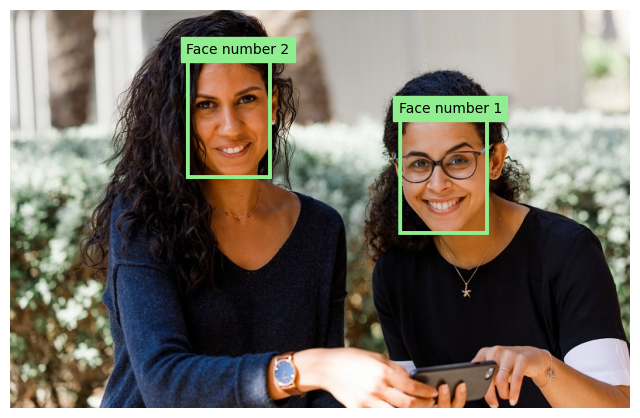

In [55]:
import os
from PIL import Image, ImageDraw
from matplotlib import pyplot as plt

# Import namespaces
from azure.ai.vision.face import FaceClient
from azure.ai.vision.face.models import FaceDetectionModel, FaceRecognitionModel, FaceAttributeTypeDetection03
from azure.core.credentials import AzureKeyCredential

def main():

    global face_client

    try:
        # Authenticate Face client
        face_client = FaceClient(
            endpoint=cog_endpoint,
            credential=AzureKeyCredential(cog_key)
        )

        DetectFaces(os.path.join('../Azure AI Vision/mslearn-ai-vision-main/Labfiles/04-face/Python/face-api/images/people.jpg'))

    except Exception as ex:
        print(ex)

def DetectFaces(image_file):
    print('Detecting faces in', image_file)

    # Specify facial features to be retrieved
    features = [FaceAttributeTypeDetection03.HEAD_POSE,
                FaceAttributeTypeDetection03.BLUR,
                FaceAttributeTypeDetection03.MASK]

    # Get faces
    with open(image_file, mode="rb") as image_data:
        detected_faces = face_client.detect(
            image_content=image_data.read(),
            detection_model=FaceDetectionModel.DETECTION03,
            recognition_model=FaceRecognitionModel.RECOGNITION04,
            return_face_id=False,
            return_face_attributes=features,
        )

        if len(detected_faces) > 0:
            print(len(detected_faces), 'faces detected.')

            # Prepare image for drawing
            fig = plt.figure(figsize=(8, 6))
            plt.axis('off')
            image = Image.open(image_file)
            draw = ImageDraw.Draw(image)
            color = 'lightgreen'
            face_count = 0

            # Draw and annotate each face
            for face in detected_faces:

                # Get face properties
                face_count += 1
                print('\nFace number {}'.format(face_count))
                print(' - Head Pose (Yaw): {}'.format(face.face_attributes.head_pose.yaw))
                print(' - Head Pose (Pitch): {}'.format(face.face_attributes.head_pose.pitch))
                print(' - Head Pose (Roll): {}'.format(face.face_attributes.head_pose.roll))
                print(' - Blur: {}'.format(face.face_attributes.blur.blur_level))
                print(' - Mask: {}'.format(face.face_attributes.mask.type))

                # Draw and annotate face
                r = face.face_rectangle
                bounding_box = ((r.left, r.top), (r.left + r.width, r.top + r.height))
                draw = ImageDraw.Draw(image)
                draw.rectangle(bounding_box, outline=color, width=5)
                annotation = 'Face number {}'.format(face_count)
                plt.annotate(annotation,(r.left, r.top), backgroundcolor=color)

            # show img
            plt.imshow(image)

            # Save annotated image
            # outputfile = 'detected_faces.jpg'
            # fig.savefig(outputfile)
            # print('\nResults saved in', outputfile)

if __name__ == "__main__":
    main()

## Portrait processing
* Detect the location of one or more human faces in images, along with attributes such as pose, face mask and facial landmarks.
* 이미지에서 하나 이상의 사람 얼굴 위치를 감지하고, 자세(pose), 마스크 착용 여부(face mask), 얼굴 특징점(facial landmarks)과 같은 속성을 함께 제공합니다.
* 얼굴만 추적하고 주변 배경 삭제